<a href="https://colab.research.google.com/github/berberberk/apnd-fs-2024/blob/main/APND2_Lotka_Volterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Условие

На примере популяционной модели «хищник-жертва», в которой учитывается ограниченность ресурса для жертв и то естественное обстоятельство, что при большом количестве жертв у хищника наступает насыщение, в зависимости от параметра 𝛼 исследовать на устойчивость в точках покоя:

\begin{cases}
\dot{x}  = x - \frac{x}{1+x}y - \alpha x^2 \\
\dot{y} = -y + \frac{x}{1+x}y
\end{cases}

Здесь x — численность жертв, y — численность хищников, γ>0.
Результаты оформить в виде программы.


In [1]:
from matplotlib import rc
rc('animation', html='jshtml')
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
x, y, alpha = sp.symbols('x y alpha')

# Уравнения системы
f1 = x - (x / (1 + x)) * y - alpha * x**2
f2 = -y + (x / (1 + x)) * y

# Нахождение точек покоя
equilibrium_points = sp.solve([f1, f2], (x, y))
print("Точки покоя:", equilibrium_points)

Точки покоя: [(0, 0), (1/alpha, 0)]


In [3]:
# Линеаризация
J = sp.Matrix([[sp.diff(f1, x), sp.diff(f1, y)],
               [sp.diff(f2, x), sp.diff(f2, y)]])

print("Матрица Якоби:")
sp.pprint(J)

Матрица Якоби:
⎡           x⋅y        y           -x    ⎤
⎢-2⋅α⋅x + ──────── - ───── + 1    ─────  ⎥
⎢                2   x + 1        x + 1  ⎥
⎢         (x + 1)                        ⎥
⎢                                        ⎥
⎢         x⋅y        y            x      ⎥
⎢     - ──────── + ─────        ───── - 1⎥
⎢              2   x + 1        x + 1    ⎥
⎣       (x + 1)                          ⎦


In [4]:
# Подстановка точек покоя в матрицу Якоби и вычисление собственных значений
for point in equilibrium_points:
    J_at_eq = J.subs({x: point[0], y: point[1]})
    eigenvals = J_at_eq.eigenvals()

    print(f"\nСобственные значения в точке покоя {point}: {list(eigenvals.keys())}")


Собственные значения в точке покоя (0, 0): [1, -1]

Собственные значения в точке покоя (1/alpha, 0): [-alpha/(alpha + 1), -1]


\begin{align}
\frac{-\alpha}{\alpha+1} < 0 \Rightarrow \alpha\in \left( -\infty; -1 \right)\cup \left( 0; +\infty  \right)
\end{align}

In [5]:
for point in equilibrium_points:
    J_at_eq = J.subs({x: point[0], y: point[1]})
    eigenvals = J_at_eq.eigenvals()
    real_parts = [ev.as_real_imag()[0] for ev in eigenvals]
    if 1/alpha not in point:
      if all(rp < 0 for rp in real_parts):
          print(f"Точка покоя {point} устойчива")
      else:
          print(f"Точка покоя {point} неустойчива")
    else:
      print(f"Точка покоя {point} устойчива на интервале (0, +inf)")

Точка покоя (0, 0) неустойчива
Точка покоя (1/alpha, 0) устойчива на интервале (0, +inf)


# Графики

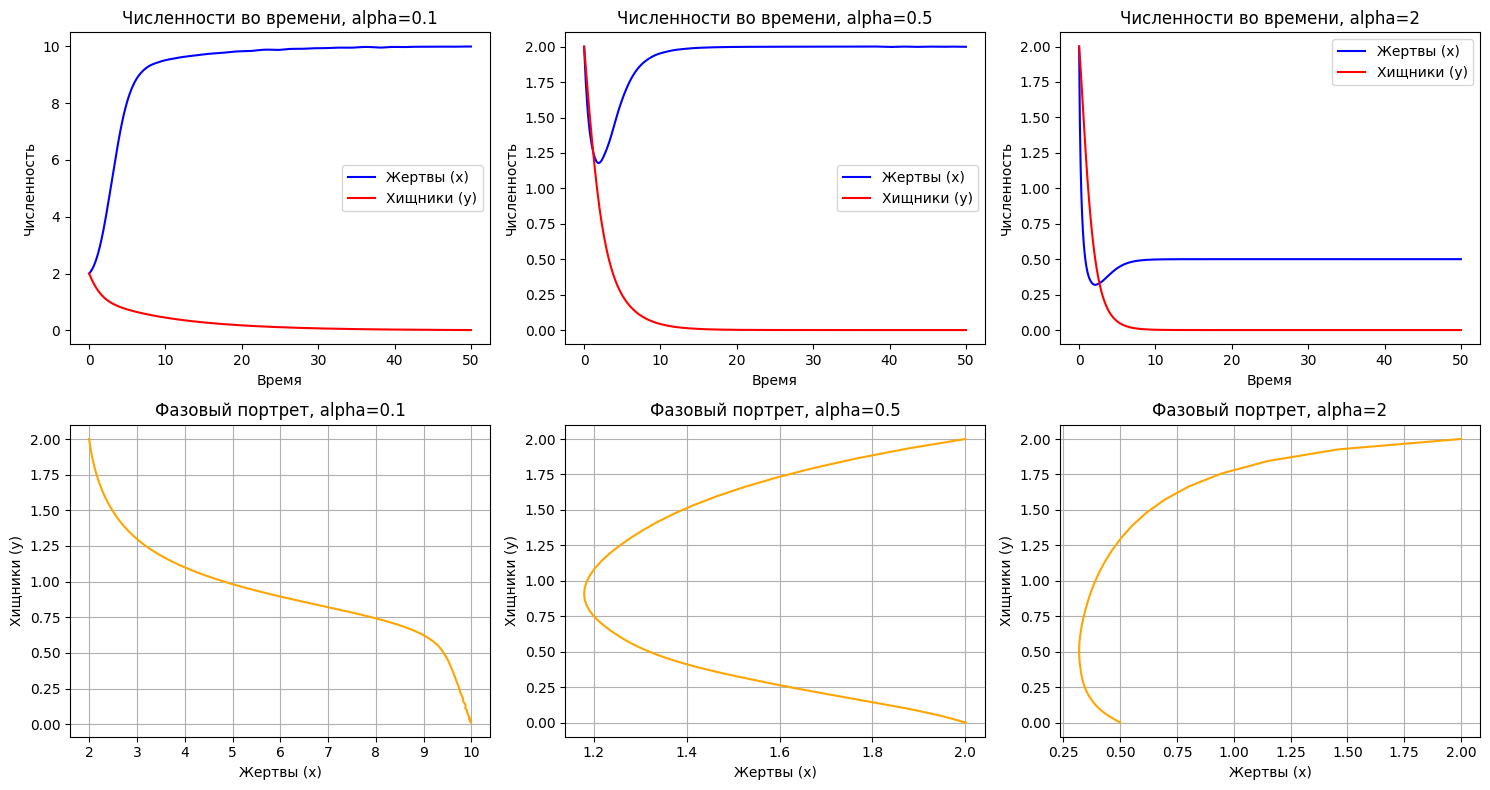

In [6]:
def predator_prey(t, z, alpha):
    x, y = z
    dxdt = x - (x / (1 + x)) * y - alpha * x**2
    dydt = -y + (x / (1 + x)) * y
    return [dxdt, dydt]

x0 = 2  # начальная численность жертв
y0 = 2  # начальная численность хищников
initial_conditions = [x0, y0]

t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 500)

alpha_values = [0.1, 0.5, 2]

fig, axes = plt.subplots(2, len(alpha_values), figsize=(15, 8))
for i, alpha in enumerate(alpha_values):
    solution = solve_ivp(predator_prey, t_span, initial_conditions, t_eval=t_eval, args=(alpha,))

    x_vals = solution.y[0]
    y_vals = solution.y[1]
    t_vals = solution.t

    axes[0, i].plot(t_vals, x_vals, label='Жертвы (x)', color='b')
    axes[0, i].plot(t_vals, y_vals, label='Хищники (y)', color='r')
    axes[0, i].set_title(f'Численности во времени, alpha={alpha}')
    axes[0, i].set_xlabel("Время")
    axes[0, i].set_ylabel("Численность")
    axes[0, i].legend()

    axes[1, i].plot(x_vals, y_vals, color='orange')
    axes[1, i].set_title(f'Фазовый портрет, alpha={alpha}')
    axes[1, i].set_xlabel("Жертвы (x)")
    axes[1, i].set_ylabel("Хищники (y)")
    axes[1, i].grid()

plt.tight_layout()
plt.show()

# Анимация

In [7]:
# Диапазон значений параметра alpha для анимации
alpha_values = np.linspace(0.01, 4.0, 100)

fig, ax = plt.subplots(figsize=(6, 6))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_xlabel('Жертвы (x)')
ax.set_ylabel('Хищники (y)')
ax.set_title('Фазовый портрет с изменением alpha')

def init():
    line.set_data([], [])
    return line,

def update(frame):
    alpha = alpha_values[frame]
    solution = solve_ivp(predator_prey, t_span, initial_conditions, t_eval=t_eval, args=(alpha,))
    x_vals = solution.y[0]
    y_vals = solution.y[1]

    line.set_data(x_vals, y_vals)
    ax.set_title(f'Фазовый портрет, alpha={alpha:.2f}')

    return line,

ani = FuncAnimation(fig, update, frames=len(alpha_values), init_func=init, blit=True, interval=100)
plt.close(fig)
ani